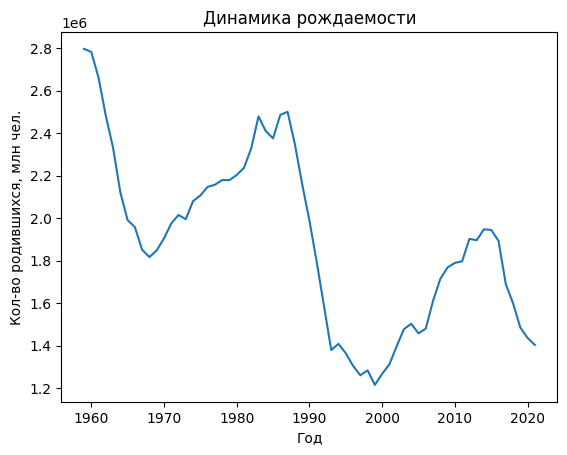

In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt 

url = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')
table = tables[0]
data = []
header = []
rows = table.find_all('tr')

for row in rows:
    cells = row.find_all(['th','td'])
    if not header:
        header = [cell.text.strip() for cell in cells]
    else:
        data.append([cell.text.strip() for cell in cells])

df = pd.DataFrame(data, columns = header)
df['Год'] = df['Год'].astype(int)
df['Количество родившихся чел.'] = df['Количество родившихся чел.'].str.replace(' ','').astype(int)

plt.plot(df['Год'], df['Количество родившихся чел.'])
plt.xlabel('Год')
plt.ylabel('Кол-во родившихся, млн чел.')
plt.title('Динамика рождаемости')
plt.show()